In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [32]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [33]:
X

array([[-8.45686503,  0.66640296],
       [-9.21968991, -6.37345197],
       [-7.99452429,  1.10898641],
       ...,
       [-9.14396973, -8.35612172],
       [-7.51695659,  0.13571187],
       [-9.08939085, -6.51188185]], shape=(1000, 2))

In [34]:
y

array([1, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 0, 2, 1,
       2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1,
       0, 2, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 1,
       0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2,
       1, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2,
       0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0,
       0, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 1, 2,
       1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0,
       0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1,
       0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0,
       2, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 1, 0,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0,

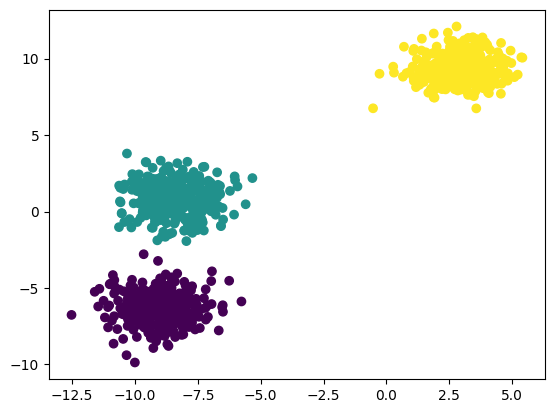

In [35]:
plt.scatter(X[:,0],X[:,1],c=y)

In [36]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [39]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [40]:
from sklearn.cluster import KMeans

In [41]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [42]:
wcss

[1340.000000000001,
 172.71736531406552,
 38.19644912000761,
 33.93052926786716,
 28.690495908009897,
 24.22282644588958,
 21.14040381841298,
 21.116311355575682,
 18.14134901913119,
 15.501418128515146]

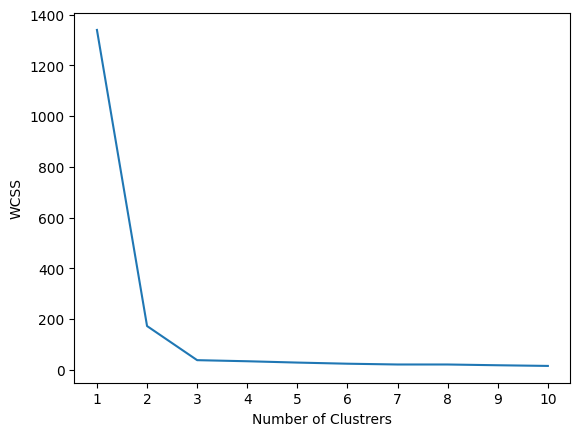

In [43]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [44]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [45]:
kmeans.fit_predict(X_train_scaled)

array([1, 1, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 0, 1,
       2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 1,
       2, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2,
       0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2,
       0, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1,
       0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1,
       1, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 1,

In [46]:
y_pred=kmeans.predict(X_test_scaled)

In [47]:
y_pred

array([2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2,
       0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2,
       1, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 0, 2, 1,
       1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1,
       0, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 1, 0, 2, 0, 1,
       0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 0,
       2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1,
       2, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 0,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2,
       0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 0,
       0, 1, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 0, 2,

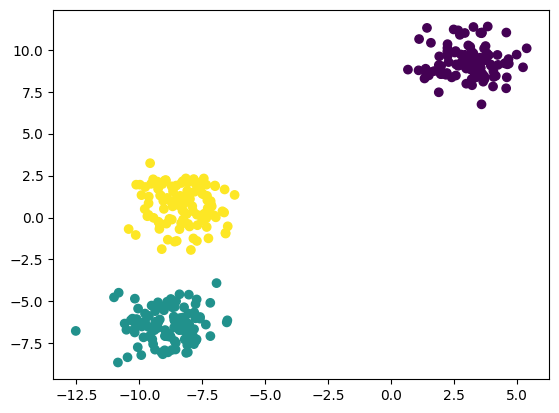

In [48]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [49]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [50]:
## kneelocator
!pip install kneed

In [51]:
from kneed import KneeLocator

In [52]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [53]:
kl.elbow

np.int64(2)

In [54]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [55]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [56]:
silhouette_coefficients

[np.float64(0.7924826342993936),
 np.float64(0.7768006378431593),
 np.float64(0.6453725790408782),
 np.float64(0.45847291471021595),
 np.float64(0.46271457080001216),
 np.float64(0.34460041646291145),
 np.float64(0.342531201334344),
 np.float64(0.3406352288658405),
 np.float64(0.32189447673027743)]

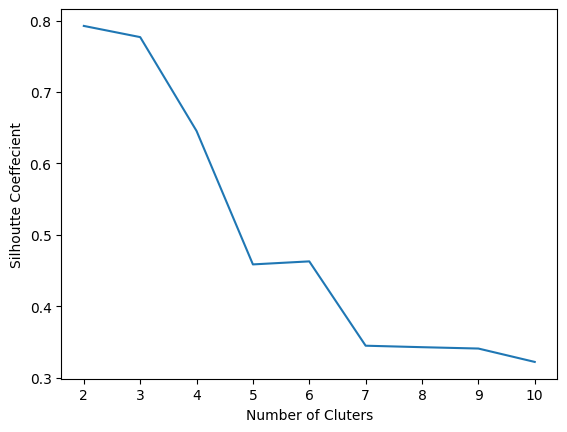

In [57]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()